In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [3]:
covid_data= pd.read_csv('owid-covid-data (1).csv')

In [24]:
list_of_variables_in_dataset = list()
for col in covid_data.columns:
    col_as_str=str(col)
    list_of_words_in_col = col_as_str.split('_')
    list_of_variables_in_dataset.append(" ".join(list_of_words_in_col).title())


['Iso Code', 'Continent', 'Location', 'Date', 'Total Cases', 'New Cases', 'New Cases Smoothed', 'Total Deaths', 'New Deaths', 'New Deaths Smoothed', 'Total Cases Per Million', 'New Cases Per Million', 'New Cases Smoothed Per Million', 'Total Deaths Per Million', 'New Deaths Per Million', 'New Deaths Smoothed Per Million', 'Reproduction Rate', 'Icu Patients', 'Icu Patients Per Million', 'Hosp Patients', 'Hosp Patients Per Million', 'Weekly Icu Admissions', 'Weekly Icu Admissions Per Million', 'Weekly Hosp Admissions', 'Weekly Hosp Admissions Per Million', 'New Tests', 'Total Tests', 'Total Tests Per Thousand', 'New Tests Per Thousand', 'New Tests Smoothed', 'New Tests Smoothed Per Thousand', 'Positive Rate', 'Tests Per Case', 'Tests Units', 'Total Vaccinations', 'People Vaccinated', 'People Fully Vaccinated', 'New Vaccinations', 'New Vaccinations Smoothed', 'Total Vaccinations Per Hundred', 'People Vaccinated Per Hundred', 'People Fully Vaccinated Per Hundred', 'New Vaccinations Smoothe

In [44]:
primary_key = covid_data.iso_code
list_of_latest_entries = list()
#To store the first index of a new tuple in the dataset
first_entry = dict()
#To store the last index of a new tuple in the dataset
last_entry = dict()
# list_of_countries=list()
# count=0
first_entry[str(covid_data.location[0])]=0
list_of_latest_entries.append(0)
for i in range(len(primary_key)-1):
    if (primary_key[i+1] != primary_key[i]):
        # count+=1
        first_entry[str(covid_data.location[i+1])]=i+1
        last_entry[str(covid_data.location[i])]=i
        #print(str(i)+'\t'+str(count)+'\t'+covid_data.location[i])
        # list_of_latest_entries.append(i)
        # list_of_countries.append(str(covid_data.location[i]))
last_entry[str(covid_data.location[len(x)-1])]=int(len(x)-1)

# for k,v in last_entry.items():
#     print(k,v)

In [45]:
# country_index_number=92
tuple_to_work_on=input("Enter the tuple you wish to work on:")
date_stored=[np.datetime64(j) for j in covid_data.date[first_entry[tuple_to_work_on]:last_entry[tuple_to_work_on]+1]]

x_axis=np.array(date_stored)

y_axis=[(i) for i in covid_data.new_cases[first_entry[tuple_to_work_on]:last_entry[tuple_to_work_on]+1]]

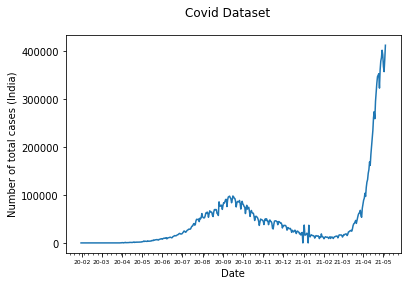

In [47]:
fig ,ax = plt.subplots()
# ax.plot(x_axis,'total_cases',data=covid_data[first_entry[tuple_to_work_on]:last_entry[tuple_to_work_on]+1]) # +1 at the end so that the range function does consider the last entry of the tuple
ax.plot(x_axis,y_axis)
# import constants for the days of the week
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

# tick on mondays every week
fmt_week = mdates.WeekdayLocator(byweekday=MO)
ax.xaxis.set_minor_locator(fmt_week)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_major_locator(fmt_month)
fig.suptitle('Covid Dataset')
plt.xlabel('Date')
plt.ylabel('Number of total cases (India)')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
#fig.autofmt_xdate()
#plt.figure(figsize=(800,200))
plt.rc('xtick',labelsize=6)
plt.show()


In [49]:
co2_data=pd.read_csv('owid-co2-data.csv')

In [50]:
co2_country=co2_data.country
list_of_latest_entries_co2=list()
list_of_countries_c02=list()
count=0
list_of_latest_entries_co2.append(0)
for i in range(len(co2_country)-1):
    if(co2_country[i+1]!=co2_country[i]):
        count+=1
        print(str(i)+'\t'+str(count)+'\t'+co2_data.country[i])
        list_of_latest_entries_co2.append(i)
        list_of_countries_c02.append(str(co2_data.country[i]))

70	1	Afghanistan
206	2	Africa
293	3	Albania
397	4	Algeria
427	5	Andorra
497	6	Angola
527	7	Anguilla
590	8	Antigua and Barbuda
723	9	Argentina
913	10	Armenia
1007	11	Aruba
1197	12	Asia
1387	13	Asia (excl. China & India)
1547	14	Australia
1749	15	Austria
1939	16	Azerbaijan
2009	17	Bahamas
2096	18	Bahrain
2170	19	Bangladesh
2262	20	Barbados
2452	21	Belarus
2643	22	Belgium
2713	23	Belize
2775	24	Benin
2845	25	Bermuda
2895	26	Bhutan
2987	27	Bolivia
3081	28	Bonaire Sint Eustatius and Saba
3216	29	Bosnia and Herzegovina
3264	30	Botswana
3383	31	Brazil
3441	32	British Virgin Islands
3528	33	Brunei
3667	34	Bulgaria
3729	35	Burkina Faso
3799	36	Burundi
3864	37	Cambodia
3934	38	Cameroon
4169	39	Canada
4239	40	Cape Verde
4300	41	Central African Republic
4361	42	Chad
4486	43	Chile
4605	44	China
4619	45	Christmas Island
4718	46	Colombia
4779	47	Comoros
4840	48	Congo
4891	49	Cook Islands
4961	50	Costa Rica
4988	51	Cote d'Ivoire
5123	52	Croatia
5202	53	Cuba
5272	54	Cyprus
5432	55	Czechia
5532	56	Democ

In [53]:
co2_year=[int(i) for i in range(2000,2020)]
co2_country=['Russia','India','Spain','France','Japan','Kuwait','United Arab Emirates','Sweden','Turkey','United States','United Kingdom']
co2_country_indices=[176,98,201,77,107,113,224,206,218,226,225]
co2_prct_rise1=np.array([[float(i) for i in co2_data.co2_growth_prct[list_of_latest_entries_co2[176]-20:list_of_latest_entries_co2[176]]],
                        [float(i) for i in co2_data.co2_growth_prct[list_of_latest_entries_co2[98]-20:list_of_latest_entries_co2[98]]],
                        [float(i) for i in co2_data.co2_growth_prct[list_of_latest_entries_co2[201]-20:list_of_latest_entries_co2[201]]],
                        [float(i) for i in co2_data.co2_growth_prct[list_of_latest_entries_co2[77]-20:list_of_latest_entries_co2[77]]],
                        [float(i) for i in co2_data.co2_growth_prct[list_of_latest_entries_co2[107]-20:list_of_latest_entries_co2[107]]],
                        [float(i) for i in co2_data.co2_growth_prct[list_of_latest_entries_co2[113]-20:list_of_latest_entries_co2[113]]],
                        [float(i) for i in co2_data.co2_growth_prct[list_of_latest_entries_co2[224]-20:list_of_latest_entries_co2[224]]],
                        [float(i) for i in co2_data.co2_growth_prct[list_of_latest_entries_co2[206]-20:list_of_latest_entries_co2[206]]],
                        [float(i) for i in co2_data.co2_growth_prct[list_of_latest_entries_co2[218]-20:list_of_latest_entries_co2[218]]],
                        [float(i) for i in co2_data.co2_growth_prct[list_of_latest_entries_co2[226]-20:list_of_latest_entries_co2[226]]],
                        [float(i) for i in co2_data.co2_growth_prct[list_of_latest_entries_co2[225]-20:list_of_latest_entries_co2[225]]]
                        ])
co2_prct_rise=co2_prct_rise1
# .transpose()

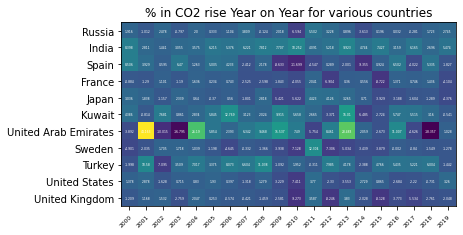

<Figure size 79200x144000 with 0 Axes>

In [54]:
fig1,ax1 = plt.subplots()
plt.figure(figsize=(1100,2000))
im1=ax1.imshow(co2_prct_rise)
ax1.set_xticks(np.arange(len(co2_year)))
ax1.set_yticks(np.arange(len(co2_country)))
# ... and label them with the respective list entries
ax1.set_xticklabels(co2_year)
ax1.set_yticklabels(co2_country)

# Rotate the tick labels and set their alignment.
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(co2_country)):
    for j in range(len(co2_year)):
        # print(i)
        # print(j)
        # print()
        text = ax1.text(j, i, co2_prct_rise[i, j],
                       ha="center", va="center", color="w",fontsize=3)

ax1.set_title("% in CO2 rise Year on Year for various countries")
#fig1.tight_layout()
plt.show()